<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/PrincipiosDeProbabilidad/Semana2/Notebooks/Variables_aleatorias%2CEsperanza%2C_varianza%2C_dependencia_independencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías y funciones

In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

####burbujas_espacio_probabilidad()



In [2]:
def burbujas_espacio_probabilidad(elementos, probabilidad):
  '''
  Función que muestra grafico de burbuja de un espacio de probabilidad de una
  variable aleatoria discreta

  elementos: lista, vector o serie que contiene los posibles elementos
  probabilidad: lista, vector o serie que contiene la probabilidad de cada
                elemento
  nombre_var: objeto de texto con el nombre de la variable aleatoria
  '''


  n = len(elementos)
  X = np.random.randint(1, 8000,n)
  Y = np.random.randint(1, 8000,n)
  P = np.array(probabilidad)
  color = np.random.rand(n)
  titulo = 'Espacio de probabilidad'
  plt.scatter(x=X, y=Y, s=P*10000,
              c = color, alpha=0.5)
  margen =2500
  plt.xlim(min(X)-margen, max(X)+margen)
  plt.ylim(min(X)-margen,max(X)+margen)
  plt.title(titulo)

  #Mostrar valores de los elementos y sus probabilidades
  for e, p, x, y in zip(elementos,P,X,Y):
    plt.annotate("{}".format(e),
                 xy=(x, y),
                 ha="center", va="center")
    #plt.annotate(e ,xy=(x, y), xytext=(0,np.sqrt(p*10000)/2.+5),
     #            textcoords="offset points", ha="center", va="bottom")

  #Eliminar texto y marcas de los ejes
  ax = plt.gca( )
  ax.axes.xaxis.set_ticks([])
  ax.axes.yaxis.set_ticks([])
  plt.show()

####prueba_independencia()

In [3]:
def prueba_independencia(pA, pB, pAnB):
  return round(pA*pB,2) == round(pAnB,2)


#### probabilidad_condicional()

In [4]:
def probabilidad_condicional(pA, pB, pAnB):
  pA_B = round(pAnB / pB, 2)
  pB_A = round(pAnB / pA, 2)
  print('P(A):', round(pA,2))
  print('P(B):', round(pB,2))
  print('P(A|B):', pA_B)
  print('P(B|A):', pB_A)
  return pA_B, pB_A

# Resultado al lanzar un dado

## Espacio de probabilidad

In [5]:
W = np.array([1, 2, 3, 4, 5, 6])   #omega
P = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

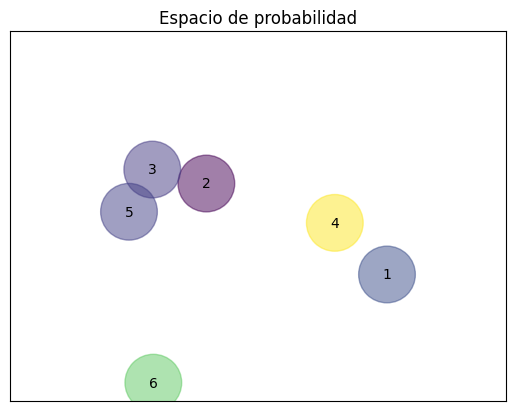

In [6]:
np.random.seed(15)
burbujas_espacio_probabilidad(W, P)

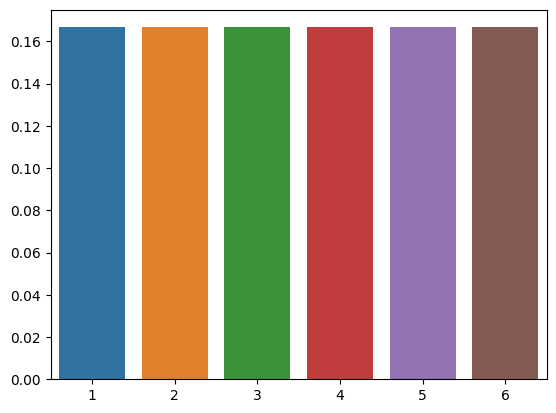

In [7]:
sns.barplot(x= W, y = P)
plt.show()

## Esperanza matemática y varianza de la distribución de probabilidad (Ley de probabilidad)

In [8]:
esperanza = 0
for elemento, probabilidad in zip(W, P):
  esperanza += elemento * probabilidad
print('la esperanza matemática de lanzar un dado es:', esperanza)

la esperanza matemática de lanzar un dado es: 3.5


In [9]:
varianza = 0
for elemento, probabilidad in zip(W, P):
  varianza += ((elemento-esperanza)**2)*probabilidad
varianza

2.9166666666666665

## Esperanza matemática y varianza de la distribución empírica

Tirar n número de veces el dado y obtener la media y la varianza

media: 3.46
varianza: 2.9084000000000003




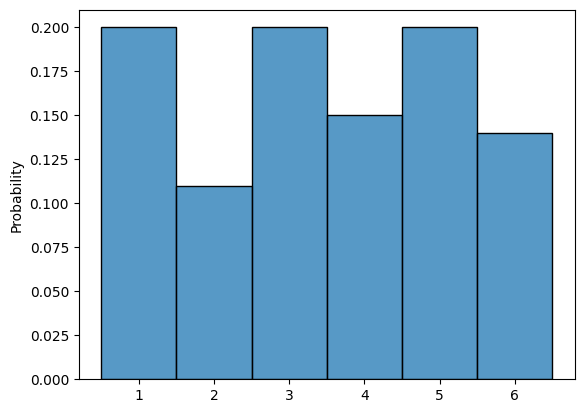

In [10]:
n=100

dado1 = []
for i in range(n):
  tiro_d1 = np.random.choice(W)
  dado1.append(tiro_d1)

media =sum(dado1)/n
varianza = sum([(x-media)**2 for x in dado1])/n

print('media: {}\nvarianza: {}\n\n'.format(media, varianza))

sns.histplot( x = np.array(dado1), discrete=True, stat = 'probability')
plt.show()

### Ejercicio 1

a) Calcular la esperanza matemática y la varianza de un jugador al tirar un dado, de acuerdo a la siguiente regla:
 - gana \$5 dolares si  tirar obtiene un 1, 2 o 3
 - gana \$10 dólares si  tirar obtiene un 4 o 5
 - pierde \$25 dólares si al tirar obtiene un 6

b) Calcular la media y la varianza empirica al simular que un jugador juega 10, 100 y 1000 y 10000 mil veces.

c) Explicar las diferencias entre la esperanza y varianza calculadas en el punto (a) y los cálculos de la media y varianza empirica del punto (b)



# Lanzar dos dados

## Ley de probabilidad de las combinaciones al tirar dos dados

In [ ]:
dado = [1, 2, 3, 4, 5, 6]

#obtener las 36 combinaciones
combinaciones = list(itertools.product(dado, repeat=2))
probabilidades = list(itertools.repeat(1/36,36))

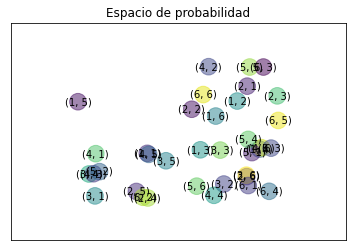

In [ ]:
np.random.seed(22)
burbujas_espacio_probabilidad(combinaciones, probabilidades)

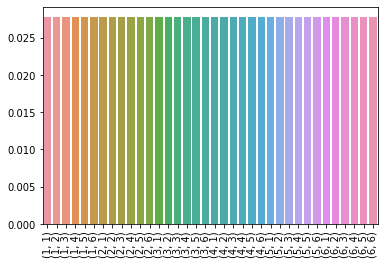

In [ ]:
grafica = sns.barplot(x= [str(i) for i in combinaciones], y = probabilidades )
grafica.set_xticklabels(grafica.get_xticklabels(), rotation=90)
plt.show()

## Ley de probabilidad de la suma de dos dados

In [ ]:
dos_dados = pd.DataFrame(combinaciones)
dos_dados.columns = ['dado1', 'dado2']
dos_dados['suma'] = dos_dados['dado1'] + dos_dados['dado2']
dos_dados['probabilidad']= probabilidades

In [ ]:
Ley_P_suma = pd.DataFrame(dos_dados['suma'].value_counts(sort=False,
                                                         normalize=True))

Ley_P_suma.reset_index(inplace=True)
Ley_P_suma.columns=['elementos', 'probabilidad']

Ley_P_suma

,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


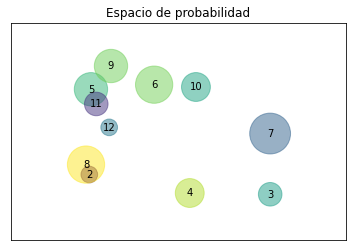

In [ ]:
np.random.seed(10)
burbujas_espacio_probabilidad(Ley_P_suma['elementos'],
                              Ley_P_suma['probabilidad'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


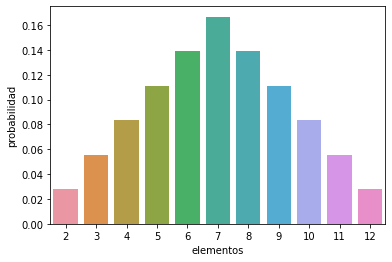

In [ ]:
sns.barplot(Ley_P_suma['elementos'], Ley_P_suma['probabilidad'] )
plt.show()

## ¿Eventos dependientes o independientes?

1. - A : obtener 1 en el primer lanzamiento,
   - B : obtener 2 en el segundo
2. - A : obtener 1 en primer lanzamiento
   - B : que la suma sea mayor a 6
3. - A : obtener un número primo repetido
   - B : obtener un número par repetido



- **Ejemplo 1**

  - A : obtener 1 en el primer lanzamiento,
  - B : obtener 2 en el segundo

In [ ]:
A = dos_dados['dado1'] == 1
B = dos_dados['dado2'] == 2

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [ ]:
prueba_independencia(p_A, p_B, p_AnB)

True

In [ ]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)

P(A): 0.17
P(B): 0.17
P(A|B): 0.17
P(B|A): 0.17


- **Ejemplo 2**
  - A : obtener 1 en primer lanzamiento
  - B : que la suma sea mayor a 6

In [ ]:
A = dos_dados['dado1'] == 1
B = dos_dados['suma'] > 6

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [ ]:
prueba_independencia(p_A, p_B, p_AnB)

False

In [ ]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)


P(A): 0.17
P(B): 0.58
P(A|B): 0.05
P(B|A): 0.17


- **Ejemplo 3**
  - A : obtener un número primo repetido
  - B : obtener un número par repetido

In [ ]:
primos = (2, 3, 5)
A = ((dos_dados['dado1'] == 2)|
     (dos_dados['dado1'] == 3)|
     (dos_dados['dado1'] == 5)) & (dos_dados['dado1']==dos_dados['dado2'])
B = ((dos_dados['dado1'] == 2)|
     (dos_dados['dado1'] == 4)|
     (dos_dados['dado1'] == 6)) & (dos_dados['dado1']==dos_dados['dado2'])

p_A = dos_dados[A]['probabilidad'].sum()
p_B = dos_dados[B]['probabilidad'].sum()
p_AnB = dos_dados[A & B]['probabilidad'].sum()

In [ ]:
prueba_independencia(p_A, p_B, p_AnB)

False

In [ ]:
pA_B, pB_A = probabilidad_condicional(p_A, p_B, p_AnB)

P(A): 0.08
P(B): 0.08
P(A|B): 0.33
P(B|A): 0.33


## Esperanza matemática y varianza de la variable aleatoria: Suma al lanzar dos dados




In [ ]:
Ley_P_suma


,elementos,probabilidad
0,2,0.027778
1,3,0.055556
2,4,0.083333
3,5,0.111111
4,6,0.138889
5,7,0.166667
6,8,0.138889
7,9,0.111111
8,10,0.083333
9,11,0.055556


In [ ]:

esperanza = (Ley_P_suma['elementos'] * Ley_P_suma['probabilidad']).sum()
round(esperanza,2)


7.0

In [ ]:
varianza = (((Ley_P_suma['elementos']-esperanza)**2)*Ley_P_suma['probabilidad']).sum()
round(varianza,2)

5.83

## Media muestral

media: 6.88
varianza: 5.81




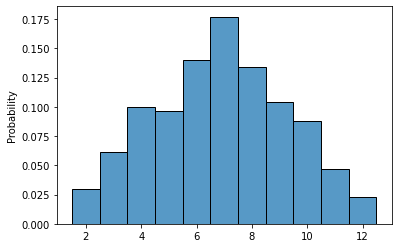

In [ ]:
n =1000
X = [1,2,3,4,5,6]

dado1 = []
dado2 = []
suma = []    #variable aleatoria ¿distribución?

for _ in range (n):
  tiro_d1 = np.random.choice(X)
  tiro_d2 = np.random.choice(X)

  dado1.append(tiro_d1)
  dado2.append(tiro_d2)
  suma.append(tiro_d1 + tiro_d2)

media =sum(suma)/n
varianza = sum([(x-media)**2 for x in suma])/n

print('media: {:.2f}\nvarianza: {:.2f}\n\n'.format(media, varianza))

sns.histplot( x = suma, discrete=True, stat = 'probability')
plt.show()
